***Capomulin & Ramicane seem to be the most effective treatments, tumors shrink by approximately 10% for both treatments.
***Significant decrease in mouse survival rate, for all treatments, except for mice treated with Capomulin and Ramicane.
***Metastatic sites seem to spread for most drugs from day one, but for Capomulin and Ramicane, the spread seems to start after day 20, indicating that the number of days of treatment can affect outcomes.

In [1]:
#Get list of files in directory
!ls

Pymaceuticals.ipynb
Pymaceuticals_Example.pdf
raw_data
TemperatureInWorldCities.png


In [2]:
#list data files that we will be using for the homework
!ls raw_data/

clinicaltrial_data.csv
mouse_drug_data.csv


In [3]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import pandas as pd
import random

In [4]:
#raw_data/clinicaltrial_data.csv
#raw_data/mouse_drug_data.csv
#read in the csv files

df_clinical_trial = pd.read_csv('raw_data/clinicaltrial_data.csv')
print(df_clinical_trial.head())

df_mouse =  pd.read_csv('raw_data/mouse_drug_data.csv')
df_mouse.head()

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                46.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
# Merge the two datasets on "Mouse ID" so that no data is lost
df_combined_data = pd.merge(df_clinical_trial, df_mouse,
                                 how='outer', on='Mouse ID')
df_combined_data.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [17]:
#Tumor Response to Treatment 
#perform a groupby on the data, on Drug and Timepoint
group_by_drug = df_combined_data.groupby(['Drug','Timepoint'])
group_by_drug

# Converting a GroupBy object into a DataFrame, and store the mean of Tumor Volume in it.
new_drug_df = pd.DataFrame(
    group_by_drug["Tumor Volume (mm3)"].mean())
new_drug_df

#present data by Drug in colums for readability and easy comparision
unstack_drug_df = new_drug_df.unstack(level='Drug')
unstack_drug_df

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.040000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [7]:
#unstack_drug_df["Tumor Volume (mm3)"]["Capomulin"]
#gathering info on the data frame, getting ready to plot
unstack_drug_df.reindex()
unstack_drug_df.index.values
unstack_drug_df.columns
unstack_drug_df.columns.levels[1]

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

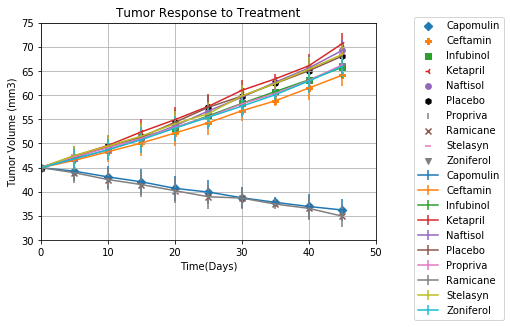

In [8]:
# Build a scatter plot for each Drug type's response to treatment
#generate scatter plots for each Drug
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Tumor Volume (mm3)"]["Capomulin"], marker="D")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Tumor Volume (mm3)"]["Ceftamin"], marker="P")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Tumor Volume (mm3)"]["Infubinol"], marker="s")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Tumor Volume (mm3)"]["Ketapril"], marker="3")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Tumor Volume (mm3)"]["Naftisol"], marker="8")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Tumor Volume (mm3)"]["Placebo"], marker="h", color="black")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Tumor Volume (mm3)"]["Propriva"], marker="|", color='grey')
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Tumor Volume (mm3)"]["Ramicane"], marker="x")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Tumor Volume (mm3)"]["Stelasyn"], marker="_")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Tumor Volume (mm3)"]["Zoniferol"], marker="v")

#generate error bars for each Drug scatter plot
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Tumor Volume (mm3)"]["Capomulin"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Tumor Volume (mm3)"]["Ceftamin"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Tumor Volume (mm3)"]["Infubinol"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Tumor Volume (mm3)"]["Ketapril"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Tumor Volume (mm3)"]["Naftisol"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Tumor Volume (mm3)"]["Placebo"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Tumor Volume (mm3)"]["Propriva"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Tumor Volume (mm3)"]["Ramicane"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Tumor Volume (mm3)"]["Stelasyn"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Tumor Volume (mm3)"]["Zoniferol"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))

# Incorporate the other graph properties
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time(Days)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.ylim([30,75])
plt.xlim([0,50])

# Show plot
plt.show()

In [9]:
# Converting a GroupBy object into a DataFrame
meta_df = pd.DataFrame(
    group_by_drug["Metastatic Sites"].mean())
meta_df

#genrating data in format that will make it easy to plot
unstack_drug_df = meta_df.unstack(level='Drug')
unstack_drug_df

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

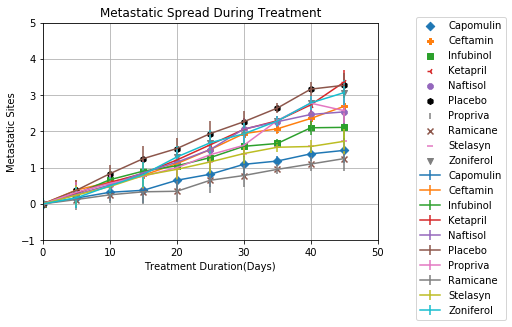

In [10]:
# Build a scatter plot for each Drug type
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Metastatic Sites"]["Capomulin"], marker="D")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Metastatic Sites"]["Ceftamin"], marker="P")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Metastatic Sites"]["Infubinol"], marker="s")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Metastatic Sites"]["Ketapril"], marker="3")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Metastatic Sites"]["Naftisol"], marker="8")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Metastatic Sites"]["Placebo"], marker="h", color="black")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Metastatic Sites"]["Propriva"], marker="|", color='grey')
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Metastatic Sites"]["Ramicane"], marker="x")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Metastatic Sites"]["Stelasyn"], marker="_")
plt.scatter(unstack_drug_df.index.values, unstack_drug_df["Metastatic Sites"]["Zoniferol"], marker="v")

#error bars for each Drug type
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Metastatic Sites"]["Capomulin"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Metastatic Sites"]["Ceftamin"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Metastatic Sites"]["Infubinol"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Metastatic Sites"]["Ketapril"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Metastatic Sites"]["Naftisol"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Metastatic Sites"]["Placebo"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Metastatic Sites"]["Propriva"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Metastatic Sites"]["Ramicane"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Metastatic Sites"]["Stelasyn"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_drug_df.index.values, 
             unstack_drug_df["Metastatic Sites"]["Zoniferol"], 
             yerr=unstack_drug_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
# Incorporate the other graph properties
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration(Days)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.ylim([-1,5])
plt.xlim([0,50])

# Show plot
plt.show()

In [20]:
#survival of mice
group_by_drug = df_combined_data.groupby(['Drug','Timepoint'])

# Converting a GroupBy object into a DataFrame
survival_df = pd.DataFrame(
    group_by_drug["Mouse ID"].count())

unstack_survival_df = survival_df.unstack(level='Drug')
unstack_survival_df
#sample data
unstack_survival_df["Mouse ID"]["Capomulin"][0]

25

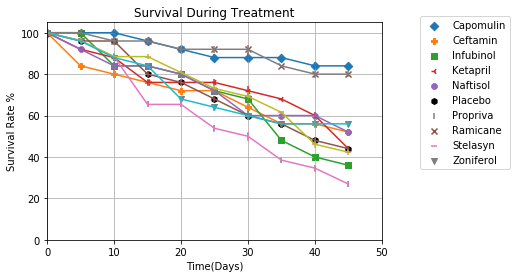

In [19]:
# Build a scatter plot for survival rates for each drug
plt.scatter(unstack_survival_df.index.values, 
            unstack_survival_df["Mouse ID"]["Capomulin"]/unstack_survival_df["Mouse ID"]["Capomulin"][0]*100, marker="D")
plt.scatter(unstack_survival_df.index.values, 
            unstack_survival_df["Mouse ID"]["Ceftamin"]/unstack_survival_df["Mouse ID"]["Ceftamin"][0]*100, marker="P")
plt.scatter(unstack_survival_df.index.values, 
            unstack_survival_df["Mouse ID"]["Infubinol"]/unstack_survival_df["Mouse ID"]["Infubinol"][0]*100, marker="s")
plt.scatter(unstack_survival_df.index.values, 
            unstack_survival_df["Mouse ID"]["Ketapril"]/unstack_survival_df["Mouse ID"]["Ketapril"][0]*100, marker="3")
plt.scatter(unstack_survival_df.index.values, 
            unstack_survival_df["Mouse ID"]["Naftisol"]/unstack_survival_df["Mouse ID"]["Naftisol"][0]*100, marker="8")
plt.scatter(unstack_survival_df.index.values, 
            unstack_survival_df["Mouse ID"]["Placebo"]/unstack_survival_df["Mouse ID"]["Placebo"][0]*100, marker="h", color="black")
plt.scatter(unstack_survival_df.index.values, 
            unstack_survival_df["Mouse ID"]["Propriva"]/unstack_survival_df["Mouse ID"]["Propriva"][0]*100, marker="|", color='grey')
plt.scatter(unstack_survival_df.index.values, 
            unstack_survival_df["Mouse ID"]["Ramicane"]/unstack_survival_df["Mouse ID"]["Ramicane"][0]*100, marker="x")
plt.scatter(unstack_survival_df.index.values, 
            unstack_survival_df["Mouse ID"]["Stelasyn"]/unstack_survival_df["Mouse ID"]["Stelasyn"][0]*100, marker="_")
plt.scatter(unstack_survival_df.index.values, 
            unstack_survival_df["Mouse ID"]["Zoniferol"]/unstack_survival_df["Mouse ID"]["Zoniferol"][0]*100, marker="v")

# Incorporate the other graph properties
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate %")
plt.xlabel("Time(Days)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.ylim([0,105])
plt.xlim([0,50])

#generate error bars
plt.errorbar(unstack_survival_df.index.values, 
             unstack_survival_df["Mouse ID"]["Capomulin"]/unstack_survival_df["Mouse ID"]["Capomulin"][0]*100, 
             yerr=unstack_survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_survival_df.index.values, 
             unstack_survival_df["Mouse ID"]["Ceftamin"]/unstack_survival_df["Mouse ID"]["Ceftamin"][0]*100, 
             yerr=unstack_survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_survival_df.index.values, 
             unstack_survival_df["Mouse ID"]["Infubinol"]/unstack_survival_df["Mouse ID"]["Infubinol"][0]*100, 
             yerr=unstack_survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_survival_df.index.values, 
             unstack_survival_df["Mouse ID"]["Ketapril"]/unstack_survival_df["Mouse ID"]["Ketapril"][0]*100, 
             yerr=unstack_survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_survival_df.index.values, 
             unstack_survival_df["Mouse ID"]["Naftisol"]/unstack_survival_df["Mouse ID"]["Naftisol"][0]*100, 
             yerr=unstack_survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_survival_df.index.values, 
             unstack_survival_df["Mouse ID"]["Placebo"]/unstack_survival_df["Mouse ID"]["Placebo"][0]*100, 
             yerr=unstack_survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_survival_df.index.values, 
             unstack_survival_df["Mouse ID"]["Propriva"]/unstack_survival_df["Mouse ID"]["Propriva"][0]*100, 
             yerr=unstack_survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_survival_df.index.values, 
             unstack_survival_df["Mouse ID"]["Ramicane"]/unstack_survival_df["Mouse ID"]["Ramicane"][0]*100, 
             yerr=unstack_survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_survival_df.index.values, 
             unstack_survival_df["Mouse ID"]["Stelasyn"]/unstack_survival_df["Mouse ID"]["Stelasyn"][0]*100, 
             yerr=unstack_survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_survival_df.index.values, 
             unstack_survival_df["Mouse ID"]["Zoniferol"]/unstack_survival_df["Mouse ID"]["Zoniferol"][0]*100, 
             yerr=unstack_survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))

# Show plot
plt.show()

In [23]:
#change in tumor over 45 days
groupbydrug = df_combined_data.groupby(["Drug","Timepoint"]).mean()

#create a new data frame
tumor_change_groupby_df=pd.DataFrame({
    "Tumor Volume (mm3)":groupbydrug["Tumor Volume (mm3)"]-45
})
tumor_change_df = tumor_change_groupby_df.reset_index()
tumor_change_df
tumor_change_df_45=tumor_change_df.loc[tumor_change_df['Timepoint'] == 45]
tumor_change_df_45=tumor_change_df_45[["Drug","Tumor Volume (mm3)"]]
tumor_change_df_45
tumor_change_df_45["Positive"]=tumor_change_df_45["Tumor Volume (mm3)"]>0
tumor_change_df_45
displaydf = tumor_change_df_45.set_index("Drug")
displaydf

,Tumor Volume (mm3),Positive
Drug,,
Capomulin,-8.763886,False
Ceftamin,19.132421,True
Infubinol,20.755562,True
Ketapril,25.662958,True
Naftisol,24.265506,True
Placebo,23.084082,True
Propriva,21.258529,True
Ramicane,-10.044405,False
Stelasyn,23.438310,True


(-15, 30)

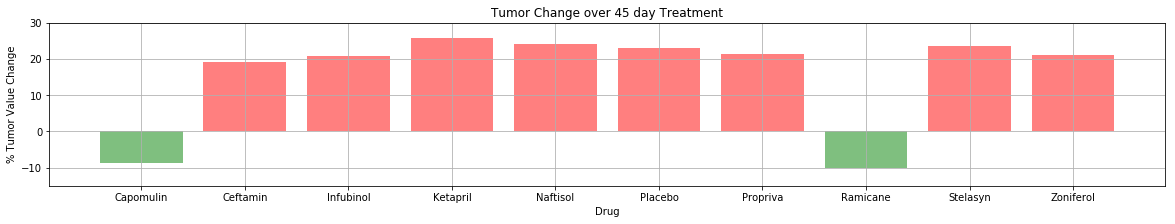

In [25]:
# Set x axis and tick locations
x_axis = np.arange(len(tumor_change_df_45))
tick_locations = [value+0.4 for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
#plt.bar(x_axis, newnewdf["Tumor Volume (mm3)"], color='r', alpha=0.5, align="edge")
# color=data.positive.map({True: 'r', False: 'k'})
plt.bar(x_axis, tumor_change_df_45["Tumor Volume (mm3)"], 
        color=tumor_change_df_45["Positive"].map({True: 'r', False: 'g'}), alpha=0.5, align="edge")


plt.xticks(tick_locations, tumor_change_df_45["Drug"])

# Incorporate the other graph properties
plt.title("Tumor Change over 45 day Treatment")
plt.ylabel("% Tumor Value Change")
plt.xlabel("Drug")
plt.grid(True)
plt.ylim([-15,30])